In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [34]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [35]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202109          7  11766     8111   15421      18          12         24   
1  202108          7  11382     8422   14342      17          13         21   
2  202107          7  13561    10315   16807      21          16         26   
3  202106          7  13401     9810   16992      20          15         25   
4  202105          7  12210     8988   15432      18          13         23   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [36]:
data = raw_data.dropna().copy()


In [37]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [38]:
data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202109          7  11766     8111   15421      18          12         24   
1  202108          7  11382     8422   14342      17          13         21   
2  202107          7  13561    10315   16807      21          16         26   
3  202106          7  13401     9810   16992      20          15         25   
4  202105          7  12210     8988   15432      18          13         23   

  geo_insee geo_name                period  
0        FR   France 2021-03-01/2021-03-07  
1        FR   France 2021-02-22/2021-02-28  
2        FR   France 2021-02-15/2021-02-21  
3        FR   France 2021-02-08/2021-02-14  
4        FR   France 2021-02-01/2021-02-07

In [39]:
sorted_data = data.set_index('period').sort_index()

In [47]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

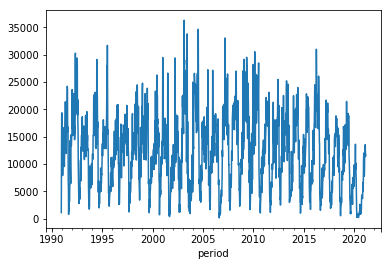

In [48]:
sorted_data['inc'].plot()

In [49]:
sorted_data.head()

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France

In [50]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    #assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

In [51]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64